# EIS metadata validation script
Used to validate Planon output with spreadsheet input

## 1. Data import

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read data. There are two datasets: Planon and Master. The latter is the EIS data nomencalture that was created. Master is made up of two subsets: loggers and meters. Loggers are sometimes called controllers and meters are sometimes called sensors. In rare cases meters or sensors are also called channels.

In [17]:
planon=pd.read_excel('EIS Assets.xlsx',index_col = 'Code')
master_loggerscontrollers = pd.read_csv('LoggersControllers.csv', index_col = 'Asset Code')
master_meterssensors = pd.read_csv('MetersSensors.csv', encoding = 'macroman', index_col = 'Asset Code')
planon['Code']=planon.index
master_loggerscontrollers['Code']=master_loggerscontrollers.index
master_meterssensors['Code']=master_meterssensors.index

Unify index, caps everything and strip of trailing spaces.

In [18]:
planon.index=[str(i).upper().strip() for i in planon.index]
master_loggerscontrollers.index=[str(i).upper().strip() for i in master_loggerscontrollers.index]
master_meterssensors.index=[str(i).upper().strip() for i in master_meterssensors.index]

Drop duplicates (shouldn't be any)

In [19]:
planon.drop_duplicates(inplace=True)
master_loggerscontrollers.drop_duplicates(inplace=True)
master_meterssensors.drop_duplicates(inplace=True)

Split Planon import into loggers and meters  
Drop duplicates (shouldn't be any)

In [20]:
# Split the Planon file into 2, one for loggers & controllers, and one for meters & sensors.
planon_loggerscontrollers = planon.loc[(planon['Classification Group'] == 'EN.EN4 BMS Controller') | (planon['Classification Group'] == 'EN.EN1 Data Logger')]
planon_meterssensors = planon.loc[(planon['Classification Group'] == 'EN.EN2 Energy Meter') | (planon['Classification Group'] == 'EN.EN3 Energy Sensor')]
planon_loggerscontrollers.drop_duplicates(inplace=True)
planon_meterssensors.drop_duplicates(inplace=True)

C:\Anaconda2\envs\python3\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


Index unique? show number of duplicates in index

In [22]:
len(planon_loggerscontrollers.index[planon_loggerscontrollers.index.duplicated()])

0

In [23]:
len(planon_meterssensors.index[planon_meterssensors.index.duplicated()])

3089

Meters are not unique. This is becasue of the spaces served. This is ok for now, we will deal with duplicates at the comparison stage. Same is true for loggers - in the unlikely event that there are duplicates in the future.

In [24]:
planon_meterssensors.head(3)

,BuildingNo.,Building,Locations.Space.Space number,Space Name,Additional Location Info,Description,Classification Group,Record,HVAC Ref,Element Description,...,Logger SIM,Meter Pulse Value,Meter Units,Meter Capacity,Network Point ID,Tenant Meter.Name,Fiscal Meter.Name,EIS Space.Space number,Utility Type.Name,Code
AP000-L01/M001,AP000,Alexandra Park,NaN,NaN,NaN,NaN,EN.EN2 Energy Meter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,AP000-L01/M001
AP000-L02/M001,AP000,Alexandra Park,NaN,NaN,NaN,Graduate House 1-11,EN.EN2 Energy Meter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,AP000-L02/M001
AP000-L02/M002,AP000,Alexandra Park,NaN,NaN,NaN,Alex Park Main,EN.EN2 Energy Meter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,AP000-L02/M002


## 2. Validation

Create list of all buildings present in Planon export. These are buildings to check the data against from Master.

In [25]:
buildings=set(planon_meterssensors['BuildingNo.'])
buildings

{'AP000',
 'AP001',
 'AP009',
 'AP010',
 'AP011',
 'AP057',
 'AP080',
 'AP081',
 'EX001',
 'MC000',
 'MC001',
 'MC003',
 'MC007',
 'MC008',
 'MC010',
 'MC011',
 'MC013',
 'MC014',
 'MC029',
 'MC030',
 'MC031',
 'MC032',
 'MC033',
 'MC043',
 'MC044',
 'MC045',
 'MC046',
 'MC047',
 'MC048',
 'MC050',
 'MC051',
 'MC053',
 'MC055',
 'MC061',
 'MC062',
 'MC063',
 'MC064',
 'MC065',
 'MC066',
 'MC067',
 'MC068',
 'MC069',
 'MC070',
 'MC071',
 'MC072',
 'MC075',
 'MC076',
 'MC077',
 'MC078',
 'MC083',
 'MC095',
 'MC099',
 'MC102',
 'MC103',
 'MC125',
 'MC126',
 'MC128',
 'MC129',
 'MC131',
 'MC134',
 'MC138',
 'MC139',
 'MC140',
 'MC141',
 'MC171',
 'MC181',
 'MC197',
 'MC198',
 'MC199',
 'MC200',
 'MC202',
 'MC203',
 'MC204',
 'MC207',
 'MC208',
 'MC210',
 'MC211',
 'OC004',
 'OC005',
 'OC006'}

In [26]:
len(buildings)

80

### 2.1. Meters

Create dataframe slice for validation from `master_meterssensors` where the only the buildings located in `buildings` are contained. Save this new slice into `master_meterssensors_for_validation`. This is done by creating sub-slices of the dataframe for each building, then concatenating them all together.

In [27]:
master_meterssensors_for_validation = \
    pd.concat([master_meterssensors.loc[master_meterssensors['Building Code'] == building] \
           for building in buildings])
master_meterssensors_for_validation.head(2)

,Logger Asset Code,Description,Make,Model,Meter Units,Meter Pulse Value,Classification Group,Logger Channel,Utility Type,??,...,Building Name,Space,Additional Location Info,Tenant meter,Fiscal meter,Parent meter,Child meters,Communications type,Electrical panel ID,Code
MC001-B01/C1,{39A16E8D-2D2B-49BC-BA47-5C2FC061DA17},Virtual CNC 1,NaN,NaN,NaN,NaN,Energy sensor,C1,NaN,NaN,...,The Croft,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,MC001-B01/C1
MC001-B01/D10,{39A16E8D-2D2B-49BC-BA47-5C2FC061DA17},DHW Control Valve and Pump,NaN,NaN,NaN,NaN,Energy sensor,D10,NaN,NaN,...,The Croft,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,MC001-B01/D10


In [28]:
master_meterssensors_for_validation.loc['MC202-B15/F15']

Logger Asset Code           {05937EE0-58E6-42F3-B6BD-A180D9634B6C}
Description                                            Function 15
Make                                                           NaN
Model                                                          NaN
Meter Units                                                    NaN
Meter Pulse Value                                              NaN
Classification Group                                 Energy sensor
Logger Channel                                                 F15
Utility Type                                                   NaN
??                                                             NaN
Meter Type                                                     NaN
Building Code                                                MC202
Building Name                              Charles Carter Building
Space                                                          NaN
Additional Location Info                                      

In [29]:
#alternative method
master_meterssensors_for_validation2 = \
    master_meterssensors[master_meterssensors['Building Code'].isin(buildings)]
master_meterssensors_for_validation2.head(2)

,Logger Asset Code,Description,Make,Model,Meter Units,Meter Pulse Value,Classification Group,Logger Channel,Utility Type,??,...,Building Name,Space,Additional Location Info,Tenant meter,Fiscal meter,Parent meter,Child meters,Communications type,Electrical panel ID,Code
MC055-B01/C1,{6BF82177-CB8B-4774-9B9C-0008202C0CE8},Virtual CNC 1,NaN,NaN,NaN,NaN,Energy sensor,C1,NaN,NaN,...,Furness Residences,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,MC055-B01/C1
MC055-B01/D1,{6BF82177-CB8B-4774-9B9C-0008202C0CE8},Heating Pumps 1 &amp; 2,NaN,NaN,NaN,NaN,Energy sensor,D1,NaN,NaN,...,Furness Residences,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,MC055-B01/D1


Planon sensors are not unique because of the spaces served convention in the two data architectures. The Planon architecture devotes a new line for each space served - hence the not unique index. The Master architecture lists all the spaces only once, as a list, therefore it has a unique index. We will need to take this into account and create matching dataframe out of planon for comparison, with a unique index.

In [31]:
len(master_meterssensors_for_validation)

30539

In [32]:
len(planon_meterssensors)-len(planon_meterssensors.index[planon_meterssensors.index.duplicated()])

29623

Sort datasets after index for easier comparison.

In [33]:
master_meterssensors_for_validation.sort_index(inplace=True)
planon_meterssensors.sort_index(inplace=True)

C:\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### 2.1.1 Slicing of meters to  only certain columns of comparison

In [35]:
planon_meterssensors.T

,AP000-L01/M001,AP000-L02/M001,AP000-L02/M002,AP000-L03/M001,AP000-L03/M002,AP001-L01/M001,AP001-L01/M002,AP001-L01/M003,AP001-L01/M004,AP001-L01/M005,...,OC006-B01/W4,OC006-B01/W5,OC006-B01/Y1,OC006-B01/Y2,OC006-B01/Y3,OC006-B01/Y4,OC006-B01/Y5,OC006-B01/Y6,OC006-B01/Z1,OC006-B01/Z2
BuildingNo.,AP000,AP000,AP000,AP000,AP000,AP001,AP001,AP001,AP001,AP001,...,OC006,OC006,OC006,OC006,OC006,OC006,OC006,OC006,OC006,OC006
Building,Alexandra Park,Alexandra Park,Alexandra Park,Alexandra Park,Alexandra Park,"House 01 - Bassenthwaite, Graduate College","House 01 - Bassenthwaite, Graduate College","House 01 - Bassenthwaite, Graduate College","House 01 - Bassenthwaite, Graduate College","House 01 - Bassenthwaite, Graduate College",...,"Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House","Chancellor's Wharf, Kent House"
Locations.Space.Space number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Space Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional Location Info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,NaN,Graduate House 1-11,Alex Park Main,NaN,NaN,NaN,Bar Cellar,Bar Ground,Services Room,Bar Water,...,ShuntPumpRotate,Manual Shunt pump changeover,Outside air temperature,Immersion Sensor,Thermistor TBTC,Room temperature,Thermistor TBTI,4DIX V,Heating Boilers,DHWS Immersion
Classification Group,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,EN.EN2 Energy Meter,...,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor,EN.EN3 Energy Sensor
Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HVAC Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Element Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
master_meterssensors_for_validation.T

,AP000-L01/M001,AP000-L02/M001,AP000-L02/M002,AP000-L03/M001,AP000-L03/M002,AP000-L99/M303,AP000-L99/M308,AP001-L01/M001,AP001-L01/M002,AP001-L01/M003,...,OC006-B01/Y1,OC006-B01/Y2,OC006-B01/Y3,OC006-B01/Y4,OC006-B01/Y5,OC006-B01/Y6,OC006-B01/Z1,OC006-B01/Z2,OC006-L99/M200,OC006-L99/M503
Logger Asset Code,050157C7ED00,37475126,37475126,48015355,48015355,NaN,NaN,0501E3E97100,0501E3E97100,0501E3E97100,...,{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},{BBD3685B-B0DC-417F-A0E8-20139B1074E1},NaN,NaN
Description,NaN,Graduate House 1-11,Alex Park Main,NaN,NaN,Alex Park LU,Alex Park UPP,NaN,Bar Cellar,Bar Ground,...,Outside air temperature,Immersion Sensor,Thermistor TBTC,Room temperature,Thermistor TBTI,4DIX V,Heating Boilers,DHWS Immersion,Kent House,Kent House
Make,Carlo Gavazzi,Actaris,Delta,,,NaN,NaN,,Elster,Landis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,EM24,Delta G,D35,,,NaN,NaN,,A1100,E1100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meter Units,kWh,NaN,NaN,NaN,NaN,NaN,NaN,m3,kWh,kWh,...,Degrees Celsius,NaN,NaN,Degrees Celsius,Degrees Celsius,NaN,NaN,NaN,NaN,NaN
Meter Pulse Value,1,NaN,NaN,NaN,NaN,NaN,NaN,0.001,0.001,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Classification Group,Energy meter,Energy meter,Energy meter,Energy meter,Energy meter,Energy meter,Energy meter,Energy meter,Energy meter,Energy meter,...,Energy sensor,Energy sensor,Energy sensor,Energy sensor,Energy sensor,Energy sensor,Energy sensor,Energy sensor,Energy meter,Energy meter
Logger Channel,1,1,2,1,2,NaN,NaN,1,2,3,...,Y1,Y2,Y3,Y4,Y5,Y6,Z1,Z2,NaN,NaN
Utility Type,Electricity,Natural Gas,Natural Gas,Water,Water,Natural Gas,Natural Gas,Water,Electricity,Electricity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity,Water
??,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create dictionary that maps Planon column names onto Master.  
  
From Nicola:  
- Code (Asset Code)  
- Description
- EIS ID (Channel)
- Utility Type
- Fiscal Meter
- Tenant Meter

`Building code` and `Building name` are implicitly included. `Logger Serial Number`, `IP` or `MAC` would be essential to include, as well as `Make` and `Model`. `Additional Location Info` is not essnetial but would be useful to have. Locations (`Locations.Space.Space number` and `Space Name`) are included in the Planon export - but this is their only viable data source, therefore are not validated against.

In [37]:
#Planon:Master
meters_match_dict={
      "BuildingNo.":"Building Code",
      "Building":"Building Name",
      "Description":"Description",
      "EIS ID":"Logger Channel",
      "Tenant Meter.Name":"Tenant meter",
      "Fiscal Meter.Name":"Fiscal meter",
      "Code":"Code"
      }

Filter both dataframes based on these new columns. Then remove duplicates. Currently, this leads to loss of information of spaces served, but also a unique index for the Planon dataframe, therefore bringing the dataframes closer to each other. When including spaces explicitly in the comparison (if we want to - or just trust the  Planon space mapping), this needs to be modified.

In [38]:
master_meterssensors_for_validation_filtered=master_meterssensors_for_validation[list(meters_match_dict.values())]
planon_meterssensors_filtered=planon_meterssensors[list(meters_match_dict.keys())]

In [39]:
pd.DataFrame(master_meterssensors_for_validation_filtered.loc['MC202-B15/F15'])

,MC202-B15/F15
Building Name,Charles Carter Building
Fiscal meter,0
Logger Channel,F15
Code,MC202-B15/F15
Building Code,MC202
Tenant meter,0
Description,Function 15


In [40]:
master_meterssensors_for_validation_filtered.head(2)

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,Alexandra Park,0.0,1,AP000-L01/M001,AP000,0.0,NaN
AP000-L02/M001,Alexandra Park,0.0,1,AP000-L02/M001,AP000,0.0,Graduate House 1-11


In [41]:
planon_meterssensors_filtered.head(2)

,Building,Fiscal Meter.Name,EIS ID,Code,BuildingNo.,Tenant Meter.Name,Description
AP000-L01/M001,Alexandra Park,No,1,AP000-L01/M001,AP000,No,NaN
AP000-L02/M001,Alexandra Park,No,1,AP000-L02/M001,AP000,No,Graduate House 1-11


Unify headers, drop duplicates (bear the mind the spaces argument, this where it needs to be brought back in in the future!).

In [42]:
planon_meterssensors_filtered.columns=[meters_match_dict[i] for i in planon_meterssensors_filtered]

In [43]:
planon_meterssensors_filtered.drop_duplicates(inplace=True)
master_meterssensors_for_validation_filtered.drop_duplicates(inplace=True)

C:\Anaconda2\envs\python3\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [44]:
planon_meterssensors_filtered.head(2)

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,Alexandra Park,No,1,AP000-L01/M001,AP000,No,NaN
AP000-L02/M001,Alexandra Park,No,1,AP000-L02/M001,AP000,No,Graduate House 1-11


Fiscal/Tenant meter name needs fixing from Yes/No and 1/0.

In [45]:
planon_meterssensors_filtered['Fiscal meter']=planon_meterssensors_filtered['Fiscal meter'].isin(['Yes'])
planon_meterssensors_filtered['Tenant meter']=planon_meterssensors_filtered['Tenant meter'].isin(['Yes'])
master_meterssensors_for_validation_filtered['Fiscal meter']=master_meterssensors_for_validation_filtered['Fiscal meter'].isin([1])
master_meterssensors_for_validation_filtered['Tenant meter']=master_meterssensors_for_validation_filtered['Tenant meter'].isin([1])

C:\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\envs\python3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [46]:
master_meterssensors_for_validation_filtered.head(2)

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,Alexandra Park,False,1,AP000-L01/M001,AP000,False,NaN
AP000-L02/M001,Alexandra Park,False,1,AP000-L02/M001,AP000,False,Graduate House 1-11


In [47]:
planon_meterssensors_filtered.head(2)

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,Alexandra Park,False,1,AP000-L01/M001,AP000,False,NaN
AP000-L02/M001,Alexandra Park,False,1,AP000-L02/M001,AP000,False,Graduate House 1-11


Cross-check missing meters

In [48]:
a=np.sort(list(set(planon_meterssensors_filtered.index)))
b=np.sort(list(set(master_meterssensors_for_validation_filtered.index)))
meterssensors_not_in_planon=[]
for i in b:
    if i not in a:
        print(i+',',end=" "),
        meterssensors_not_in_planon.append(i)
print('\n\nMeters in Master, but not in Planon:',
      len(meterssensors_not_in_planon),'/',len(b),':',
      round(len(meterssensors_not_in_planon)/len(b)*100,3),'%')

AP000-L99/M303, AP000-L99/M308, MC000-L99/M201, MC000-L99/M202, MC000-L99/M203, MC000-L99/M506, MC001-L99/M100, MC001-L99/M222, MC001-L99/M224, MC001-L99/M306, MC001-L99/M508, MC003-L99/M207, MC003-L99/M304, MC003-L99/M509, MC007-L99/M211, MC007-L99/M511, MC008-L99/M302, MC047-L02/M00??, MC061-L99/M305, MC061-L99/M310, MC102-L99/M309, MC103-L99/M216, MC103-L99/M300, MC103-L99/M504, MC204-L99/M312, MC210-L01/M001, MC210-L01/M002, MC210-L01/M003, MC210-L01/M004, MC210-L01/M005, MC210-L01/M006, MC210-L01/M007, MC210-L01/M008, MC210-L01/M009, MC210-L01/M010, MC210-L01/M011, MC210-L01/M012, MC210-L01/M013, MC210-L01/M014, MC210-L01/M015, MC210-L01/M016, MC210-L01/M017, MC210-L01/M018, MC210-L01/M019, MC210-L01/M020, MC210-L01/M021, MC210-L01/M022, MC210-L01/M023, MC210-L01/M024, MC210-L01/M025, MC210-L01/M026, MC210-L01/M027, MC210-L01/M028, MC210-L01/M029, MC210-L01/M030, MC210-L02/M001, MC210-L02/M002, MC210-L02/M003, MC210-L02/M004, MC210-L02/M005, MC210-L02/M006, MC210-L02/M007, MC210-L

In [52]:
#without MC210
len(set([i for i in meterssensors_not_in_planon if i[:5]!='MC210']))

32

In [49]:
set([i for i in meterssensors_not_in_planon if i[:5]!='MC210'])

{'AP000-L99/M303',
 'AP000-L99/M308',
 'MC000-L99/M201',
 'MC000-L99/M202',
 'MC000-L99/M203',
 'MC000-L99/M506',
 'MC001-L99/M100',
 'MC001-L99/M222',
 'MC001-L99/M224',
 'MC001-L99/M306',
 'MC001-L99/M508',
 'MC003-L99/M207',
 'MC003-L99/M304',
 'MC003-L99/M509',
 'MC007-L99/M211',
 'MC007-L99/M511',
 'MC008-L99/M302',
 'MC047-L02/M00??',
 'MC061-L99/M305',
 'MC061-L99/M310',
 'MC102-L99/M309',
 'MC103-L99/M216',
 'MC103-L99/M300',
 'MC103-L99/M504',
 'MC204-L99/M312',
 'NAN',
 'OC004-L99/M206',
 'OC004-L99/M512',
 'OC005-L99/M204',
 'OC005-L99/M505',
 'OC006-L99/M200',
 'OC006-L99/M503'}

In [51]:
(set([i[:5] for i in meterssensors_not_in_planon]))

{'AP000',
 'MC000',
 'MC001',
 'MC003',
 'MC007',
 'MC008',
 'MC047',
 'MC061',
 'MC102',
 'MC103',
 'MC204',
 'MC210',
 'NAN',
 'OC004',
 'OC005',
 'OC006'}

In [53]:
a=np.sort(list(set(planon_meterssensors_filtered.index)))
b=np.sort(list(set(master_meterssensors_for_validation_filtered.index)))
meterssensors_not_in_master=[]
for i in a:
    if i not in b:
        print(i+',',end=" "),
        meterssensors_not_in_master.append(i)
print('\n\nMeters in Planon, not in Master:',
      len(meterssensors_not_in_master),'/',len(a),':',
      round(len(meterssensors_not_in_master)/len(a)*100,3),'%')



Meters in Planon, not in Master: 0 / 29623 : 0.0 %


In [54]:
len(set([i for i in meterssensors_not_in_master]))

0

In [55]:
set([i[:9] for i in meterssensors_not_in_master])

set()

In [56]:
set([i[:5] for i in meterssensors_not_in_master])

set()

Check for duplicates in index, but not duplicates over the entire row

In [57]:
print(len(planon_meterssensors_filtered.index))
print(len(set(planon_meterssensors_filtered.index)))
print(len(master_meterssensors_for_validation_filtered.index))
print(len(set(master_meterssensors_for_validation_filtered.index)))

29623
29623
30494
29708


In [58]:
master_meterssensors_for_validation_filtered[master_meterssensors_for_validation_filtered.index.duplicated()]

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
MC011-B01/I1,The Roundhouse,False,i1,MC011-B01/i1,MC011,False,xcite/IO/16DI
MC011-B01/I2,The Roundhouse,False,I2,MC011-B01/I2,MC011,False,LTHW Pri Pmp Flow
MC011-B01/O1,The Roundhouse,False,O1,MC011-B01/O1,MC011,False,Heating
MC014-B01/O1,Bowland Hall,False,o1,MC014-B01/o1,MC014,False,Alarm Route 1
MC014-B02/O1,Bowland Hall,False,O1,MC014-B02/O1,MC014,False,Heating times
MC014-B03/O1,Bowland Hall,False,O1,MC014-B03/O1,MC014,False,Heating times
MC014-B04/O1,Bowland Hall,False,o1,MC014-B04/o1,MC014,False,Alarm Route 1
MC014-B05/O1,Bowland Hall,False,o1,MC014-B05/o1,MC014,False,Alarm Route 1
MC014-B06/O1,Bowland Hall,False,o1,MC014-B06/o1,MC014,False,Alarm Route 1
MC014-B07/O1,Bowland Hall,False,O1,MC014-B07/O1,MC014,False,Heating times


The duplicates are the `nan`s. Remove these for now. Could revisit later to do an index-less comparison, only over row contents.

In [59]:
good_index=[i for i in master_meterssensors_for_validation_filtered.index if str(i).lower().strip()!='nan']
master_meterssensors_for_validation_filtered=master_meterssensors_for_validation_filtered.loc[good_index]
master_meterssensors_for_validation_filtered.drop_duplicates(inplace=True)

In [60]:
len(planon_meterssensors_filtered)

29623

In [61]:
len(master_meterssensors_for_validation_filtered)

30139

Do comparison only on common indices. Need to revisit and identify the cause missing meters, both ways (5 Planon->Meters and 30 Meters->Planon in this example).

In [62]:
comon_index=list(set(master_meterssensors_for_validation_filtered.index).intersection(set(planon_meterssensors_filtered.index)))

In [63]:
len(comon_index)

29623

In [64]:
master_meterssensors_for_validation_intersected=master_meterssensors_for_validation_filtered.loc[comon_index].sort_index()
planon_meterssensors_intersected=planon_meterssensors_filtered.loc[comon_index].sort_index()

In [65]:
len(master_meterssensors_for_validation_intersected)

30055

In [66]:
len(planon_meterssensors_intersected)

29623

Still have duplicate indices. For now we just drop and keep the first.

In [67]:
master_meterssensors_for_validation_intersected = master_meterssensors_for_validation_intersected[~master_meterssensors_for_validation_intersected.index.duplicated(keep='first')]

In [68]:
master_meterssensors_for_validation_intersected.head(2)

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,Alexandra Park,False,1,AP000-L01/M001,AP000,False,NaN
AP000-L02/M001,Alexandra Park,False,1,AP000-L02/M001,AP000,False,Graduate House 1-11


In [69]:
planon_meterssensors_intersected.head(2)

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,Alexandra Park,False,1,AP000-L01/M001,AP000,False,NaN
AP000-L02/M001,Alexandra Park,False,1,AP000-L02/M001,AP000,False,Graduate House 1-11


#### 2.1.2. Primitive comparison

In [70]:
planon_meterssensors_intersected==master_meterssensors_for_validation_intersected

,Building Name,Fiscal meter,Logger Channel,Code,Building Code,Tenant meter,Description
AP000-L01/M001,True,True,False,True,True,True,False
AP000-L02/M001,True,True,False,True,True,True,True
AP000-L02/M002,True,True,False,True,True,True,True
AP000-L03/M001,True,True,False,True,True,True,False
AP000-L03/M002,True,True,False,True,True,True,False
AP001-L01/M001,False,True,False,True,True,True,False
AP001-L01/M002,False,True,False,True,True,True,False
AP001-L01/M003,False,True,False,True,True,True,False
AP001-L01/M004,False,True,False,True,True,True,False
AP001-L01/M005,False,True,False,True,True,True,True


In [71]:
np.all(planon_meterssensors_intersected==master_meterssensors_for_validation_intersected)

False

#### 2.1.3. Horizontal comparison

Number of cells matching

In [72]:
(planon_meterssensors_intersected==master_meterssensors_for_validation_intersected).sum()

Building Name     29089
Fiscal meter      29623
Logger Channel    28760
Code              29423
Building Code     29623
Tenant meter      29623
Description       27944
dtype: int64

Percentage matching

In [73]:
(planon_meterssensors_intersected==master_meterssensors_for_validation_intersected).sum()/\
len(planon_meterssensors_intersected)*100

Building Name      98.197347
Fiscal meter      100.000000
Logger Channel     97.086723
Code               99.324849
Building Code     100.000000
Tenant meter      100.000000
Description        94.332107
dtype: float64

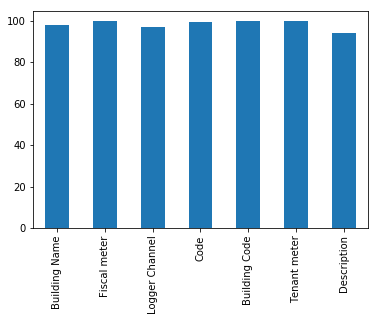

In [74]:
((planon_meterssensors_intersected==master_meterssensors_for_validation_intersected).sum()/\
len(planon_meterssensors_intersected)*100).plot(kind='bar')

#### 2.1.4. Vertical comparison

In [75]:
df=pd.DataFrame((planon_meterssensors_intersected.T==master_meterssensors_for_validation_intersected.T).sum())
df

,0
AP000-L01/M001,5
AP000-L02/M001,6
AP000-L02/M002,6
AP000-L03/M001,5
AP000-L03/M002,5
AP001-L01/M001,4
AP001-L01/M002,4
AP001-L01/M003,4
AP001-L01/M004,4
AP001-L01/M005,5


In [76]:
df=pd.DataFrame((planon_meterssensors_intersected.T==master_meterssensors_for_validation_intersected.T).sum()/\
len(planon_meterssensors_intersected.T)*100)
df[df[0]<100]

,0
AP000-L01/M001,71.428571
AP000-L02/M001,85.714286
AP000-L02/M002,85.714286
AP000-L03/M001,71.428571
AP000-L03/M002,71.428571
AP001-L01/M001,57.142857
AP001-L01/M002,57.142857
AP001-L01/M003,57.142857
AP001-L01/M004,57.142857
AP001-L01/M005,71.428571


#### 2.1.5. Smart(er) comparison

Not all of the dataframe matches. Let us do some basic string formatting, maybe that helps.

In [77]:
sum(planon_meterssensors_intersected['Description']!=master_meterssensors_for_validation_intersected['Description'])

1679

In [78]:
planon_meterssensors_intersected['Description']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ') for s in planon_meterssensors_intersected['Description'].values]
master_meterssensors_for_validation_intersected['Description']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ') for s in master_meterssensors_for_validation_intersected['Description'].values]

In [79]:
sum(planon_meterssensors_intersected['Description']!=master_meterssensors_for_validation_intersected['Description'])

404

Some errors fixed, some left. Let's see which ones. These are either:  
- Wrong duplicate dropped
- Input human erros in the description.
- Actual erros somewhere in the indexing.

In [80]:
for i in planon_meterssensors_intersected[planon_meterssensors_intersected['Description']!=master_meterssensors_for_validation_intersected['Description']].index:
    print(i,'\t\tPlanon:',planon_meterssensors_intersected.loc[i]['Description'],'\t\tMaster:',master_meterssensors_for_validation_intersected.loc[i]['Description'])

MC014-B01/L4 		Planon: nan 		Master: 
MC014-B02/L4 		Planon: nan 		Master: 
MC014-B03/L4 		Planon: nan 		Master: 
MC014-B03/O1 		Planon: alarm route 1 		Master: heating times
MC014-B04/L4 		Planon: nan 		Master: 
MC014-B04/O1 		Planon: alarm route 1 		Master: heating times
MC014-B05/L4 		Planon: nan 		Master: 
MC014-B06/L4 		Planon: nan 		Master: 
MC014-B07/L4 		Planon: nan 		Master: 
MC014-B08/L4 		Planon: nan 		Master: 
MC014-B08/O1 		Planon: heating times 		Master: alarm route 1
MC014-B09/L4 		Planon: nan 		Master: 
MC014-B10/L4 		Planon: nan 		Master: 
MC014-B10/O1 		Planon: heating times 		Master: alarm route 1
MC014-B11/L4 		Planon: nan 		Master: 
MC014-B12/L4 		Planon: nan 		Master: 
MC014-B13/L4 		Planon: nan 		Master: 
MC014-B14/L4 		Planon: nan 		Master: 
MC014-B14/O1 		Planon: heating times 		Master: alarm route 1
MC029-B01/L4 		Planon: nan 		Master: 
MC031-B01/I2 		Planon: heating pump status 		Master: xcite/io/2ui/2ao
MC031-B01/I4 		Planon: xcite/io/8di 		Master: greathall

Let us repeat the exercise for `Logger Channel`. Cross-validate, flag as highly likely error where both mismatch.

In [81]:
sum(planon_meterssensors_intersected['Logger Channel']!=master_meterssensors_for_validation_intersected['Logger Channel'])

863

In [82]:
planon_meterssensors_intersected['Logger Channel']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ') for s in planon_meterssensors_intersected['Logger Channel'].values]
master_meterssensors_for_validation_intersected['Logger Channel']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ') for s in master_meterssensors_for_validation_intersected['Logger Channel'].values]

In [83]:
sum(planon_meterssensors_intersected['Logger Channel']!=master_meterssensors_for_validation_intersected['Logger Channel'])

0

All errors fixed on logger channels.

In [84]:
for i in planon_meterssensors_intersected[planon_meterssensors_intersected['Logger Channel']!=master_meterssensors_for_validation_intersected['Logger Channel']].index:
    print(i,'\t\tPlanon:',planon_meterssensors_intersected.loc[i]['Logger Channel'],'\t\tMaster:',master_meterssensors_for_validation_intersected.loc[i]['Logger Channel'])

New error percentage:

In [85]:
(planon_meterssensors_intersected!=master_meterssensors_for_validation_intersected).sum()/\
len(planon_meterssensors_intersected)*100

Building Name     1.802653
Fiscal meter      0.000000
Logger Channel    0.000000
Code              0.675151
Building Code     0.000000
Tenant meter      0.000000
Description       1.363805
dtype: float64

### 2.2. Loggers

In [143]:
buildings=set(planon_loggerscontrollers['BuildingNo.'])
buildings

{'AP000',
 'AP001',
 'AP009',
 'AP010',
 'AP011',
 'AP057',
 'AP080',
 'AP081',
 'EX001',
 'MC001',
 'MC003',
 'MC007',
 'MC008',
 'MC010',
 'MC011',
 'MC013',
 'MC014',
 'MC029',
 'MC030',
 'MC031',
 'MC032',
 'MC033',
 'MC042',
 'MC043',
 'MC044',
 'MC045',
 'MC046',
 'MC047',
 'MC048',
 'MC050',
 'MC051',
 'MC053',
 'MC055',
 'MC060',
 'MC061',
 'MC062',
 'MC063',
 'MC064',
 'MC065',
 'MC066',
 'MC067',
 'MC068',
 'MC069',
 'MC070',
 'MC071',
 'MC072',
 'MC075',
 'MC076',
 'MC077',
 'MC078',
 'MC083',
 'MC095',
 'MC099',
 'MC102',
 'MC103',
 'MC125',
 'MC126',
 'MC128',
 'MC129',
 'MC131',
 'MC134',
 'MC138',
 'MC139',
 'MC140',
 'MC141',
 'MC171',
 'MC181',
 'MC197',
 'MC198',
 'MC199',
 'MC200',
 'MC202',
 'MC203',
 'MC204',
 'MC207',
 'MC210',
 'MC211',
 'OC004',
 'OC005',
 'OC006'}

In [145]:
master_loggerscontrollers_for_validation = \
    pd.concat([master_loggerscontrollers.loc[master_loggerscontrollers['Building Code'] == building] \
           for building in buildings])
master_loggerscontrollers_for_validation.head(2)

,Building Code,Building Name,Space,Description,Classification Group,Make,Model,Logger Serial Number,Logger Mac Address,Logger Ip Address,Logger Modem Serial Number,Logger Sim,Network Point Id,Logger Upstream Comms Target,Additional Location Info
AP009-L01,AP009,"House 09 - Devoke, Graduate College",A124,Data logger: Graduate College - House 9,Data logger,Enercom,Multilog G2,0501E38A6300,00-50-C2-2C-3D-CB,NaN,NaN,NaN,NaN,NaN,"Devoke House, Room A124"
MC014-L01,MC014,Bowland Hall,A0,Data logger: Bowland Hall,Data logger,Enercom,Multilog G2,050137C89C00,00-50-C2-2C-3E-38,10.23.12.9,NaN,NaN,NaN,NaN,House 2 SR1 / House 4 SR1


In [146]:
master_loggerscontrollers[master_loggerscontrollers['Building Code']=='MC060']

,Building Code,Building Name,Space,Description,Classification Group,Make,Model,Logger Serial Number,Logger Mac Address,Logger Ip Address,Logger Modem Serial Number,Logger Sim,Network Point Id,Logger Upstream Comms Target,Additional Location Info
MC060-L01,MC060,"Furness Residences, Bardsea",PL1,Data logger: Furness Residences,Data logger,Enercom,Multilog G2,0501988FCB00,00-50-C2-2C-3E-32,10.23.12.13,NaN,NaN,NaN,NaN,NaN


In [147]:
planon_loggerscontrollers[planon_loggerscontrollers['BuildingNo.']=='MC060']

,BuildingNo.,Building,Locations.Space.Space number,Space Name,Additional Location Info,Description,Classification Group,Record,HVAC Ref,Element Description,...,Logger MAC Address,Logger SIM,Meter Pulse Value,Meter Units,Meter Capacity,Network Point ID,Tenant Meter.Name,Fiscal Meter.Name,EIS Space.Space number,Utility Type.Name
MC060-L01,MC060,"Furness Residences, Bardsea",PL1,Plant Room,NaN,Data logger: Furness Residences,EN.EN1 Data Logger,NaN,NaN,NaN,...,00-50-C2-2C-3E-32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
master_loggerscontrollers.loc['MC060-L01']

Building Code                                             MC060
Building Name                       Furness Residences, Bardsea
Space                                                       PL1
Description                     Data logger: Furness Residences
Classification Group                                Data logger
Make                                                    Enercom
Model                                               Multilog G2
Logger Serial Number                               0501988FCB00
Logger Mac Address                            00-50-C2-2C-3E-32
Logger Ip Address                                   10.23.12.13
Logger Modem Serial Number                                  NaN
Logger Sim                                                  NaN
Network Point Id                                            NaN
Logger Upstream Comms Target                                NaN
Additional Location Info                                    NaN
Name: MC060-L01, dtype: object

In [149]:
len(master_loggerscontrollers_for_validation)

291

In [150]:
len(planon_loggerscontrollers)-len(planon_loggerscontrollers.index[planon_loggerscontrollers.index.duplicated()])

273

In [151]:
master_loggerscontrollers_for_validation.sort_index(inplace=True)
planon_loggerscontrollers.sort_index(inplace=True)

In [152]:
master_loggerscontrollers_for_validation.loc['MC060-L01']

Building Code                                             MC060
Building Name                       Furness Residences, Bardsea
Space                                                       PL1
Description                     Data logger: Furness Residences
Classification Group                                Data logger
Make                                                    Enercom
Model                                               Multilog G2
Logger Serial Number                               0501988FCB00
Logger Mac Address                            00-50-C2-2C-3E-32
Logger Ip Address                                   10.23.12.13
Logger Modem Serial Number                                  NaN
Logger Sim                                                  NaN
Network Point Id                                            NaN
Logger Upstream Comms Target                                NaN
Additional Location Info                                    NaN
Name: MC060-L01, dtype: object

In [153]:
planon_loggerscontrollers.T

,AP000-L01,AP000-L02,AP000-L03,AP001-L01,AP009-L01,AP010-L01,AP011-L01,AP057-L01,AP080-L01,AP081-L01,...,MC204-L05,MC204-L06,MC207-B01,MC210-B01,MC210-B02,MC210-B03,MC211-B01,OC004-B01,OC005-B01,OC006-B01
BuildingNo.,AP000,AP000,AP000,AP001,AP009,AP010,AP011,AP057,AP080,AP081,...,MC204,MC204,MC207,MC210,MC210,MC210,MC211,OC004,OC005,OC006
Building,Alexandra Park,Alexandra Park,Alexandra Park,"House 01 - Bassenthwaite, Graduate College","House 09 - Devoke, Graduate College","House 10 - Elterwater, Graduate College","House 11 - Ennerdale, Graduate College",Alexandra Park Laundrette,Lonsdale House (Block 12),Barker House Farm,...,Sports Centre,Sports Centre,HR Building,Engineering Building,Engineering Building,Engineering Building,Life Sciences & Environment Laboratories,"Chancellor's Wharf, Wyre House","Chancellor's Wharf, Lune House","Chancellor's Wharf, Kent House"
Locations.Space.Space number,A0,A0,A0,A104,A124,A109,A102,A0,A13,A64,...,RF04,RF04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Space Name,Whole Site,Whole Site,Whole Site,Electrical Riser,Electrical Riser/Cupboard,Electrical Riser,Electrical Riser,Whole Building,Laundrette,Service Riser,...,Roof Top Plant Room,Roof Top Plant Room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional Location Info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,Data logger: Alexandra Park,Data logger: Alexandra Park,Data logger: Alexandra Park,Data logger: Graduate College - House 1,Data logger: Graduate College - House 9,Data logger: Graduate College - House 10,Data logger: Graduate College - House 11,Data logger: Alexandra Park Laundrette,Data logger: Lonsdale House - Laundrette,Data logger: Barker House Farm,...,Data logger: Sports Centre,Data logger: Sports Centre,BMS Controller: HR Building,BMS Controller: Engineering Building,BMS Controller: Engineering Building,BMS Controller: Engineering Building,BMS Controller: Life Sciences & Environment La...,BMS Controller: Chancellors Wharf,BMS Controller: Chancellors Wharf,BMS Controller: Chancellors Wharf
Classification Group,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN1 Data Logger,...,EN.EN1 Data Logger,EN.EN1 Data Logger,EN.EN4 BMS Controller,EN.EN4 BMS Controller,EN.EN4 BMS Controller,EN.EN4 BMS Controller,EN.EN4 BMS Controller,EN.EN4 BMS Controller,EN.EN4 BMS Controller,EN.EN4 BMS Controller
Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HVAC Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Element Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
master_loggerscontrollers_for_validation.T

,AP000-L01,AP000-L02,AP000-L03,AP001-L01,AP009-L01,AP010-L01,AP011-L01,AP057-L01,AP080-L01,AP081-L01,...,MC210-B01,MC210-B02,MC210-B03,MC210-L01,MC210-L02,MC211-B01,NAN,OC004-B01,OC005-B01,OC006-B01
Building Code,AP000,AP000,AP000,AP001,AP009,AP010,AP011,AP057,AP080,AP081,...,MC210,MC210,MC210,MC210,MC210,MC211,MC202,OC004,OC005,OC006
Building Name,Alexandra Park,Alexandra Park,Alexandra Park,"House 01 - Bassenthwaite, Graduate College","House 09 - Devoke, Graduate College","House 10 - Elterwater, Graduate College","House 11 - Ennerdale, Graduate College",Alexandra Park Laundrette,Lonsdale House (Block 12),Barker House Farm,...,Engineering Building,Engineering Building,Engineering Building,Engineering Building,Engineering Building,Life Sciences & Environment Laboratories,Charles Carter Building,Chancellors Wharf,Chancellors Wharf,Chancellors Wharf
Space,A0,A0,A0,A104,A124,A109,A102,A0,A13,A64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,Data logger: Alexandra Park,Data logger: Alexandra Park,Data logger: Alexandra Park,Data logger: Graduate College - House 1,Data logger: Graduate College - House 9,Data logger: Graduate College - House 10,Data logger: Graduate College - House 11,Data logger: Alexandra Park Laundrette,Data logger: Lonsdale House - Laundrette,Data logger: Barker House Farm,...,BMS Controller: Engineering Building,BMS Controller: Engineering Building,BMS Controller: Engineering Building,Data logger: Engineering,Data logger: Engineering,BMS Controller: Life Sciences & Environment La...,Data logger: Charles Carter Building,BMS Controller: Chancellors Wharf,BMS Controller: Chancellors Wharf,BMS Controller: Chancellors Wharf
Classification Group,Data logger,Data logger,Data logger,Data logger,Data logger,Data logger,Data logger,Data logger,Data logger,Data logger,...,BMS controller,BMS controller,BMS controller,Data logger,Data logger,BMS controller,Data logger,BMS controller,BMS controller,BMS controller
Make,Enercom,Enercom,Enercom,Enercom,Enercom,Enercom,Enercom,Enercom,Enercom,Enercom,...,Trend,Trend,Trend,SIP,SIP,Trend,Synetica,Trend,Trend,Trend
Model,Multilog G2,Multilog G2,Multilog G2,Multilog G2,Multilog G2,Multilog G2,Multilog G2,Multilog G2,Multilog G2,Multilog G2,...,IQ3xcite128,IQ3xcite128,IQ3xcite128,SIP MLog,SIP MLog,IQ3xcite96,DS800-M-32,IQ3xact12,IQ3xact12,IQ3xact12
Logger Serial Number,050157C7ED00,37475126,48015355,0501E3E97100,0501E38A6300,0501E3D07500,0501E3839500,050157C16100,050157AB6700,050157C09600,...,{0F850990-984A-49FC-B351-82CCFD6A644B},{B39C7903-72F6-4B03-A5B6-6CE8CF57D680},{9DA6D329-30E9-46CC-A840-5B656A5FFDC2},NaN,NaN,{C587E3F2-E604-4C9B-827D-80797E53FC58},47e22ca9-a8f8-4781-963d-31382df0d5c6,{48352BB4-4B1B-4013-AB9F-14E143E83948},{281682DC-5479-4064-8290-E873933872B0},{BBD3685B-B0DC-417F-A0E8-20139B1074E1}
Logger Mac Address,00-50-C2-2C-3E-43,NaN,NaN,00-50-C2-2C-3D-DE,00-50-C2-2C-3D-CB,00-50-C2-2C-3D-D1,00-50-C2-2C-3D-A7,NaN,00-50-C2-2C-3D-1B,00-50-C2-2C-3D-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logger Ip Address,10.23.9.39,NaN,NaN,10.23.12.36,NaN,10.23.12.37,10.23.12.38,80.93.175.91:40455,10.23.9.40,10.23.9.41,...,ng-bms01-e01.bms.local,ng-bms02-e01.bms.local,ng-bms03-e01.bms.local,10.23.16.51,10.23.16.52,bs-bms01-bslplant.bms.local,cc-meter01-plant.bms.local,cw-meter03-plant.bms.local,cw-meter02-plant.bms.local,cw-meter01-plant.bms.local


Create dictionary that maps Planon column names onto Master.  
  
From Nicola:  
- EIS ID (Serial Number)
- Make
- Model
- Description
- Code (Asset Code)
- Building Code

`Building code` and `Building name` are implicitly included. `Logger IP` or `MAC` would be essential to include, as well as `Make` and `Model`. `Additional Location Info` is not essnetial but would be useful to have. Locations (`Locations.Space.Space number` and `Space Name`) are included in the Planon export - but this is their only viable data source, therefore are not validated against.

In [155]:
#Planon:Master
loggers_match_dict={
      "BuildingNo.":"Building Code",
      "Building":"Building Name",
      "Description":"Description",
      "EIS ID":"Logger Serial Number",
      "Make":"Make",
      "Model":"Model"
      }

In [156]:
master_loggerscontrollers_for_validation_filtered=master_loggerscontrollers_for_validation[list(loggers_match_dict.values())]
planon_loggerscontrollers_filtered=planon_loggerscontrollers[list(loggers_match_dict.keys())]

In [157]:
master_loggerscontrollers_for_validation_filtered.head(2)

,Description,Building Code,Building Name,Logger Serial Number,Make,Model
AP000-L01,Data logger: Alexandra Park,AP000,Alexandra Park,050157C7ED00,Enercom,Multilog G2
AP000-L02,Data logger: Alexandra Park,AP000,Alexandra Park,37475126,Enercom,Multilog G2


In [158]:
planon_loggerscontrollers_filtered.head(2)

,Description,BuildingNo.,Building,EIS ID,Make,Model
AP000-L01,Data logger: Alexandra Park,AP000,Alexandra Park,050157C7ED00,Enercom,Multilog G2
AP000-L02,Data logger: Alexandra Park,AP000,Alexandra Park,37475126,Enercom,Multilog G2


In [159]:
planon_loggerscontrollers_filtered.columns=[loggers_match_dict[i] for i in planon_loggerscontrollers_filtered]

In [160]:
planon_loggerscontrollers_filtered.drop_duplicates(inplace=True)
master_loggerscontrollers_for_validation_filtered.drop_duplicates(inplace=True)

C:\Anaconda2\envs\python3\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [161]:
planon_loggerscontrollers_filtered.head(2)

,Description,Building Code,Building Name,Logger Serial Number,Make,Model
AP000-L01,Data logger: Alexandra Park,AP000,Alexandra Park,050157C7ED00,Enercom,Multilog G2
AP000-L02,Data logger: Alexandra Park,AP000,Alexandra Park,37475126,Enercom,Multilog G2


In [162]:
master_loggerscontrollers_for_validation_filtered.head(2)

,Description,Building Code,Building Name,Logger Serial Number,Make,Model
AP000-L01,Data logger: Alexandra Park,AP000,Alexandra Park,050157C7ED00,Enercom,Multilog G2
AP000-L02,Data logger: Alexandra Park,AP000,Alexandra Park,37475126,Enercom,Multilog G2


In [163]:
a=np.sort(list(set(planon_loggerscontrollers_filtered.index)))
b=np.sort(list(set(master_loggerscontrollers_for_validation_filtered.index)))
loggerscontrollers_not_in_planon=[]
for i in b:
    if i not in a:
        print(i+',',end=" "),
        loggerscontrollers_not_in_planon.append(i)
print('\n\nLoggers in Master, but not in Planon:',
      len(loggerscontrollers_not_in_planon),'/',len(b),':',
      round(len(loggerscontrollers_not_in_planon)/len(b)*100,3),'%')

MC032-L01, MC032-L03, MC044-L02, MC046-L01, MC046-L19, MC061-L01, MC076-B03, MC204-L03, MC207-L01, MC210-L01, NAN, 

Loggers in Master, but not in Planon: 11 / 284 : 3.873 %


In [164]:
a=np.sort(list(set(planon_loggerscontrollers_filtered.index)))
b=np.sort(list(set(master_loggerscontrollers_for_validation_filtered.index)))
loggerscontrollers_not_in_master=[]
for i in a:
    if i not in b:
        print(i+',',end=" "),
        loggerscontrollers_not_in_master.append(i)
print('\n\nLoggers in Planon, not in Master:',
      len(loggerscontrollers_not_in_master),'/',len(a),':',
      round(len(loggerscontrollers_not_in_master)/len(a)*100,3),'%')



Loggers in Planon, not in Master: 0 / 273 : 0.0 %


In [88]:
print(len(planon_loggerscontrollers_filtered.index))
print(len(set(planon_loggerscontrollers_filtered.index)))
print(len(master_loggerscontrollers_for_validation_filtered.index))
print(len(set(master_loggerscontrollers_for_validation_filtered.index)))

273
273
282
282


In [89]:
master_loggerscontrollers_for_validation_filtered[master_loggerscontrollers_for_validation_filtered.index.duplicated()]

,Description,Building Code,Building Name,Logger Serial Number,Make,Model


In [90]:
comon_index=list(set(master_loggerscontrollers_for_validation_filtered.index).intersection(set(planon_loggerscontrollers_filtered.index)))

In [91]:
master_loggerscontrollers_for_validation_intersected=master_loggerscontrollers_for_validation_filtered.loc[comon_index].sort_index()
planon_loggerscontrollers_intersected=planon_loggerscontrollers_filtered.loc[comon_index].sort_index()

In [92]:
master_loggerscontrollers_for_validation_intersected.head(2)

,Description,Building Code,Building Name,Logger Serial Number,Make,Model
AP000-L01,Data logger: Alexandra Park,AP000,Alexandra Park,050157C7ED00,Enercom,Multilog G2
AP000-L02,Data logger: Alexandra Park,AP000,Alexandra Park,37475126,Enercom,Multilog G2


In [93]:
planon_loggerscontrollers_intersected.head(2)

,Description,Building Code,Building Name,Logger Serial Number,Make,Model
AP000-L01,Data logger: Alexandra Park,AP000,Alexandra Park,050157C7ED00,Enercom,Multilog G2
AP000-L02,Data logger: Alexandra Park,AP000,Alexandra Park,37475126,Enercom,Multilog G2


In [94]:
planon_loggerscontrollers_intersected==master_loggerscontrollers_for_validation_intersected

,Description,Building Code,Building Name,Logger Serial Number,Make,Model
AP000-L01,True,True,True,True,True,True
AP000-L02,True,True,True,False,True,True
AP000-L03,True,True,True,False,True,True
AP001-L01,True,True,True,True,True,True
AP009-L01,True,True,True,True,True,True
AP010-L01,True,True,True,True,True,True
AP011-L01,True,True,True,True,True,True
AP057-L01,True,True,True,True,True,True
AP080-L01,True,True,True,True,True,True
AP081-L01,True,True,True,True,True,True


Loggers matching

In [95]:
(planon_loggerscontrollers_intersected==master_loggerscontrollers_for_validation_intersected).sum()

Description             271
Building Code           271
Building Name           254
Logger Serial Number    138
Make                    271
Model                   271
dtype: int64

Percentage matching

In [96]:
(planon_loggerscontrollers_intersected==master_loggerscontrollers_for_validation_intersected).sum()/\
len(planon_loggerscontrollers_intersected)*100

Description             100.000000
Building Code           100.000000
Building Name            93.726937
Logger Serial Number     50.922509
Make                    100.000000
Model                   100.000000
dtype: float64

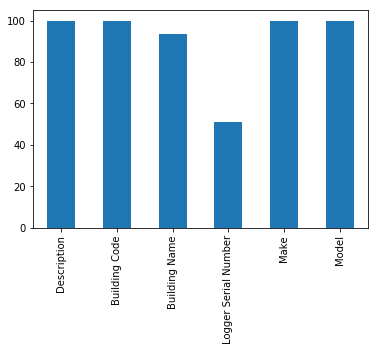

In [97]:
((planon_loggerscontrollers_intersected==master_loggerscontrollers_for_validation_intersected).sum()/\
len(planon_loggerscontrollers_intersected)*100).plot(kind='bar')

Loggers not matching on `Building Name`.

In [98]:
sum(planon_loggerscontrollers_intersected['Building Name']!=master_loggerscontrollers_for_validation_intersected['Building Name'])

17

In [99]:
planon_loggerscontrollers_intersected['Building Name']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ') for s in planon_loggerscontrollers_intersected['Building Name'].values]
master_loggerscontrollers_for_validation_intersected['Building Name']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ') for s in master_loggerscontrollers_for_validation_intersected['Building Name'].values]

In [100]:
sum(planon_loggerscontrollers_intersected['Building Name']!=master_loggerscontrollers_for_validation_intersected['Building Name'])

16

That didnt help.

In [101]:
for i in planon_loggerscontrollers_intersected[planon_loggerscontrollers_intersected['Building Name']!=master_loggerscontrollers_for_validation_intersected['Building Name']].index:
    print(i,'\t\tPlanon:',planon_loggerscontrollers_intersected.loc[i]['Building Name'],'\t\tMaster:',master_loggerscontrollers_for_validation_intersected.loc[i]['Building Name'])

EX001-B01 		Planon: roads - main campus 		Master: underpass
MC029-B01 		Planon: cetad 		Master: bowland hall cetad
MC033-L03 		Planon: county john creed 		Master: john creed
MC047-B02 		Planon: welcome centre 		Master: conference centre
MC047-L01 		Planon: welcome centre 		Master: conference centre
MC047-L02 		Planon: welcome centre 		Master: conference centre
MC055-B01 		Planon: furness residences 		Master: furness blocks
MC071-B01 		Planon: furness college 		Master: furness
MC072-B02 		Planon: psc 		Master: psc building
MC072-B04 		Planon: psc 		Master: psc building
MC103-B01 		Planon: lancaster house hotel 		Master: hotel
MC198-B01 		Planon: grizedale college - offices, bar & social space 		Master: grizedale
MC198-B02 		Planon: grizedale college - offices, bar & social space 		Master: grizedale
OC004-B01 		Planon: chancellor's wharf, wyre house 		Master: chancellors wharf
OC005-B01 		Planon: chancellor's wharf, lune house 		Master: chancellors wharf
OC006-B01 		Planon: chancellor's 

Follow up with lexical distance comparison. That would flag this as a match.

Loggers not matching on `Serial Number`.

In [102]:
sum(planon_loggerscontrollers_intersected['Logger Serial Number']!=master_loggerscontrollers_for_validation_intersected['Logger Serial Number'])

133

In [103]:
planon_loggerscontrollers_intersected['Logger Serial Number']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ').replace('{','').replace('}','') for s in planon_loggerscontrollers_intersected['Logger Serial Number'].values]
master_loggerscontrollers_for_validation_intersected['Logger Serial Number']=[str(s).lower().strip().replace('  ',' ').replace('   ',' ').replace('{','').replace('}','') for s in master_loggerscontrollers_for_validation_intersected['Logger Serial Number'].values]

In [104]:
sum(planon_loggerscontrollers_intersected['Logger Serial Number']!=master_loggerscontrollers_for_validation_intersected['Logger Serial Number'])

9

In [105]:
for i in planon_loggerscontrollers_intersected[planon_loggerscontrollers_intersected['Logger Serial Number']!=master_loggerscontrollers_for_validation_intersected['Logger Serial Number']].index:
    print(i,'\t\tPlanon:',planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number'],'\t\tMaster:',master_loggerscontrollers_for_validation_intersected.loc[i]['Logger Serial Number'])

MC032-L04 		Planon: 50198367 		Master: 050198367e00
MC046-L05 		Planon: 50198895300 		Master: 050198895300
MC063-L01 		Planon: 50198829500 		Master: 050198829500
MC064-L03 		Planon: 50198872600 		Master: 050198872600
MC071-L02 		Planon: 50201286300 		Master: 050201286300
MC071-L05 		Planon: 50201221 		Master: 050201221e00
MC071-L16 		Planon: 50198904000 		Master: 050198904000
MC078-L03 		Planon: 50198864300 		Master: 050198864300
MC102-L01 		Planon: 50157909800 		Master: 050157909800


Technically the same, but there is a number format error. Compare based on float value, if they match, replace one of them. This needs to be amended, as it will throw `cannot onvert to float` exception if strings are left in from the previous step.

In [106]:
z1=[]
z2=[]    
for i in planon_loggerscontrollers_intersected.index:
    if planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number']!=master_loggerscontrollers_for_validation_intersected.loc[i]['Logger Serial Number']:
        if float(planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number'])==\
          float(master_loggerscontrollers_for_validation_intersected.loc[i]['Logger Serial Number']):
                z1.append(str(int(float(planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number']))))
                z2.append(str(int(float(planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number']))))
        else:
            z1.append(planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number'])
            z2.append(master_loggerscontrollers_for_validation_intersected.loc[i]['Logger Serial Number'])
    else:
        z1.append(planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number'])
        z2.append(planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number'])
planon_loggerscontrollers_intersected['Logger Serial Number']=z1
master_loggerscontrollers_for_validation_intersected['Logger Serial Number']=z2

In [107]:
for i in planon_loggerscontrollers_intersected[planon_loggerscontrollers_intersected['Logger Serial Number']!=master_loggerscontrollers_for_validation_intersected['Logger Serial Number']].index:
    print(i,'\t\tPlanon:',planon_loggerscontrollers_intersected.loc[i]['Logger Serial Number'],'\t\tMaster:',master_loggerscontrollers_for_validation_intersected.loc[i]['Logger Serial Number'])

New error percentage:

In [108]:
(planon_loggerscontrollers_intersected!=master_loggerscontrollers_for_validation_intersected).sum()/\
len(planon_loggerscontrollers_intersected)*100

Description             0.000000
Building Code           0.000000
Building Name           5.904059
Logger Serial Number    0.000000
Make                    0.000000
Model                   0.000000
dtype: float64

(Bearing in my mind the above, this is technically 0)